In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Problema  1

Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la función debe devolver una imagen la cual tenga activos los canales de color según los siguientes
puntos:
Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y verde.
Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y azul.
Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y rojo.

In [26]:
def mantener_color_activo(imagen, color):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    monocromo = np.zeros((alto, ancho, 3))
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = imagen[i,j]
            azul = pixel[2]
            verde = pixel[1]
            rojo = pixel[0]
            monocromo[i,j] = [azul if color == 1 or color == 20 or color == 30 else 0, 
                              verde if color == 2 or color == 10 or color == 20 else 0, 
                              rojo if color == 3 or color == 10 or color == 30 else 0] 
    return monocromo

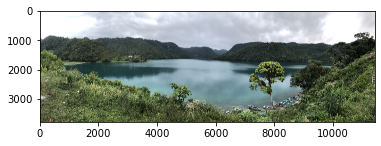

In [29]:
imagen1=cv2.imread("Imagen.jpg")
imagen1=cv2.cvtColor(imagen1,cv2.COLOR_BGR2RGB)
plt.imshow(imagen1)
plt.show()

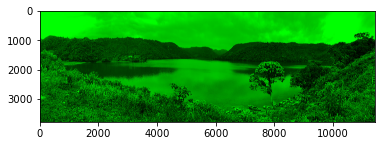

In [30]:
imag = mantener_color_activo(imagen1, color=2)
cv2.imwrite("imagpana.jpg", imag)
imagpana=cv2.imread("imagpana.jpg")
imagpana=cv2.cvtColor(imagpana,cv2.COLOR_BGR2RGB)
plt.imshow(imagpana)
plt.show()

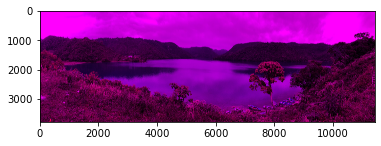

In [31]:
imag = mantener_color_activo(imagen1, color=30)
cv2.imwrite("imagpana.jpg", imag)
imagpana=cv2.imread("imagpana.jpg")
imagpana=cv2.cvtColor(imagpana,cv2.COLOR_BGR2RGB)
plt.imshow(imagpana)
plt.show()

#### Problema  3

Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2

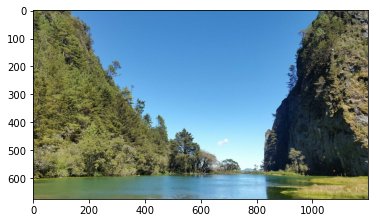

In [34]:
imag=cv2.imread("laguna.jpg")
imag=cv2.cvtColor(imag,cv2.COLOR_BGR2RGB)
plt.imshow(imag)
plt.show()

In [37]:
def genGrayScale(imagen):
    
    img = cv2.imread(imagen)
    img.shape
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    alto = img.shape[0]
    ancho = img.shape[1]
    media_ponderada1 = np.zeros((alto, ancho, 1))
    media_ponderada2 = np.zeros((alto, ancho, 1))
    media_ponderada3 = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
            for j in range(0, ancho):
                pixel = img[i, j]
                blue = pixel[2]
                green = pixel[1]
                red = pixel[0]
                media_ponderada1[i, j] = int(0.299*blue + 0.587*0 + 0.114*0)
    cv2.imwrite("gris_a.jpg", media_ponderada1)
    gris_a = cv2.imread("gris_a.jpg")
    gris_a = cv2.cvtColor(gris_a, cv2.COLOR_BGR2RGB)

    for i in range(0, alto):
            for j in range(0, ancho):
                pixel = img[i, j]
                blue = pixel[2]
                green = pixel[1]
                red = pixel[0]
                media_ponderada2[i, j] = int(0.299*0 + 0.587*green + 0.114*0)
    cv2.imwrite("gris_v.jpg", media_ponderada2)
    gris_v = cv2.imread("gris_v.jpg")
    gris_v = cv2.cvtColor(gris_v, cv2.COLOR_BGR2RGB)

    for i in range(0, alto):
            for j in range(0, ancho):
                pixel = img[i, j]
                blue = pixel[2]
                green = pixel[1]
                red = pixel[0]
                media_ponderada3[i, j] = int(0.299*0 + 0.587*0 + 0.114*red)
    cv2.imwrite("gris_r.jpg", media_ponderada3)
    gris_r = cv2.imread("gris_r.jpg")
    gris_r = cv2.cvtColor(gris_r, cv2.COLOR_BGR2RGB)

In [39]:
genGrayScale("laguna.jpg")

#### Problema  4

Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media de la distribución

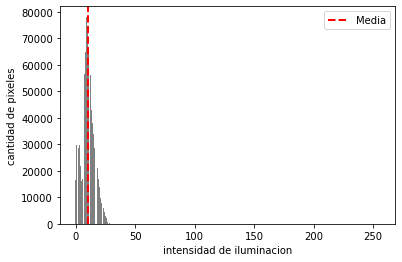

In [53]:
img = cv2.imread('gris_r.jpg', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
media = sum(i * hist[i] for i in range(256)) / sum(hist)
plt.bar(range(256), hist[:, 0], color='gray')
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.legend()
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()
cv2.destroyAllWindows()

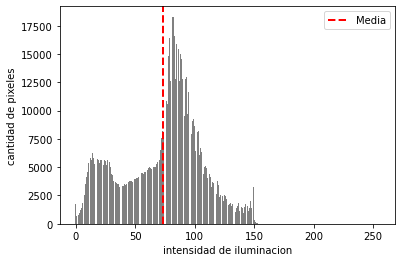

In [51]:
img = cv2.imread('gris_v.jpg', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
media = sum(i * hist[i] for i in range(256)) / sum(hist)
plt.bar(range(256), hist[:, 0], color='gray')
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.legend()
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()
cv2.destroyAllWindows()

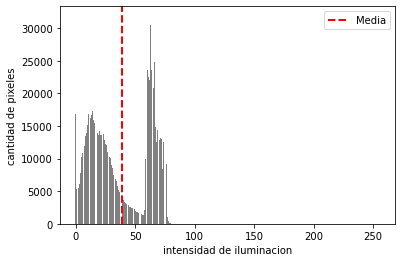

In [52]:
img = cv2.imread('gris_a.jpg', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
media = sum(i * hist[i] for i in range(256)) / sum(hist)
plt.bar(range(256), hist[:, 0], color='gray')
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.legend()
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()
cv2.destroyAllWindows()

#### Problema  5

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho especio, para entregar este ejercicio puede hacer con un archivo PDF